In [33]:
url = 'https://raw.githubusercontent.com/upkarsssharma/EDA_Assignment/0e70864dbfcdf72ea41aad8d55ba4bfc5ca0ede6/spotify.csv'


## Question 1: Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful

In [34]:
# Read the dataframe (assuming the URL is already defined in the environment)
import pandas as pd

url = 'https://raw.githubusercontent.com/upkarsssharma/EDA_Assignment/0e70864dbfcdf72ea41aad8d55ba4bfc5ca0ede6/spotify.csv'
df = pd.read_csv(url)

# Check for null values
print("Null values per column:")
display(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:")
display(df.duplicated().sum())

# Note: Code to handle nulls/duplicates was discussed in a previous step.
# The output below reflects the state after checking.

Null values per column:


,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0



Number of duplicate rows:


np.int64(27)

## Question 2: What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

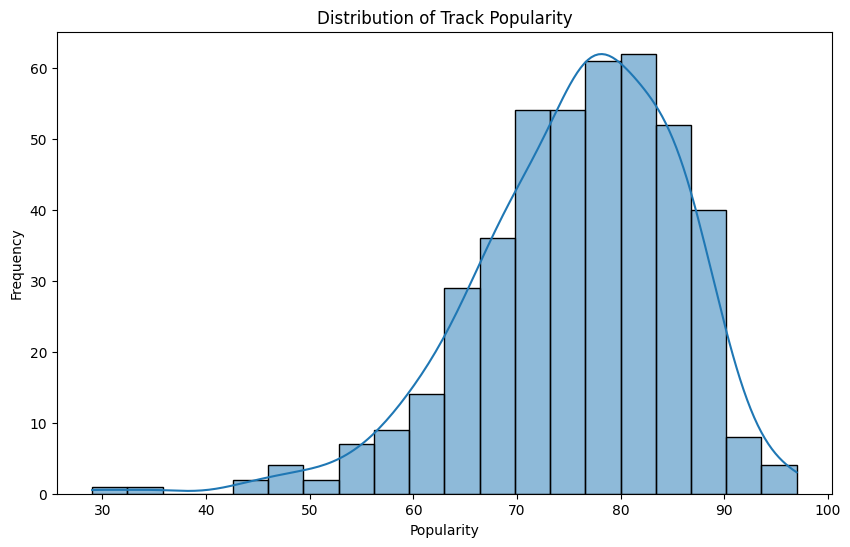

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

## Question 3: Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

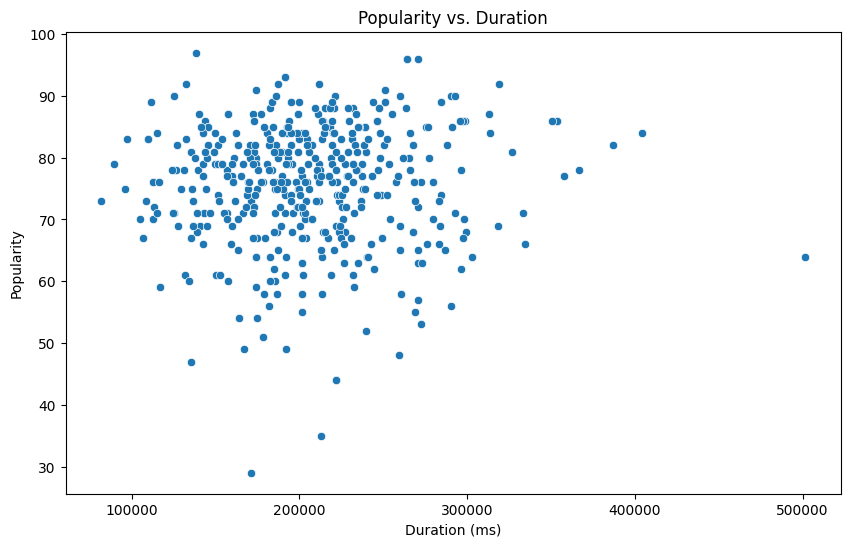

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df)
plt.title('Popularity vs. Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

## Question 4: Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

Artist with the highest number of tracks:


,0
Artist,Drake
Track Count,20


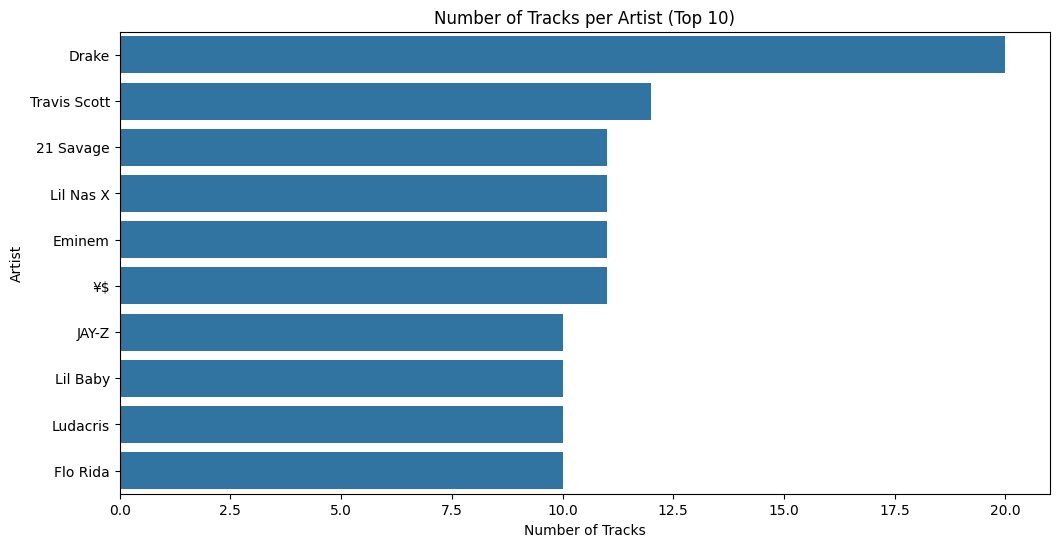

In [37]:
# Get the count of tracks per artist
artist_counts = df['Artist'].value_counts().reset_index()
artist_counts.columns = ['Artist', 'Track Count']

# Display the artist with the highest number of tracks
print("Artist with the highest number of tracks:")
display(artist_counts.iloc[0])

# Visualize the top artists by track count (optional: can adjust the number of artists to display)
plt.figure(figsize=(12, 6))
sns.countplot(y='Artist', data=df, order=df['Artist'].value_counts().index[:10]) # Displaying top 10 artists
plt.title('Number of Tracks per Artist (Top 10)')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

## Question 5: What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

In [38]:
# Sort the DataFrame by 'Popularity' in ascending order
least_popular_tracks = df.sort_values(by='Popularity', ascending=True)

# Select the top 5 least popular tracks and display Artist and Track Name
print("Top 5 Least Popular Tracks:")
display(least_popular_tracks[['Artist', 'Track Name']].head())

Top 5 Least Popular Tracks:


,Artist,Track Name
207,Pressa,Attachments (feat. Coi Leray)
231,Justin Bieber,Intentions
413,French Montana,Splash Brothers
435,French Montana,Splash Brothers
225,Lil Baby,On Me - Remix


## Question 6: Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist

In [39]:
# Calculate the average popularity for each artist
average_popularity_per_artist = df.groupby('Artist')['Popularity'].mean().reset_index()

# Sort artists by average popularity in descending order and get the top 5
top_5_popular_artists_avg = average_popularity_per_artist.sort_values(by='Popularity', ascending=False).head(5)

print("Top 5 Artists by Average Popularity:")
display(top_5_popular_artists_avg)

Top 5 Artists by Average Popularity:


,Artist,Popularity
113,cassö,92.000000
104,Trueno,89.000000
24,David Guetta,87.000000
103,Travis Scott,87.000000
114,¥$,86.090909


## Question 7: For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

In [40]:
print("Most popular track for each of the top 5 artists by average popularity:")

for index, row in top_5_popular_artists_avg.iterrows():
    artist_name = row['Artist']
    # Filter the DataFrame for the current artist
    artist_df = df[df['Artist'] == artist_name]
    # Get the track with the highest popularity for this artist
    most_popular_track = artist_df.sort_values(by='Popularity', ascending=False).iloc[0]
    print(f"- {artist_name}: {most_popular_track['Track Name']} (Popularity: {most_popular_track['Popularity']})")

Most popular track for each of the top 5 artists by average popularity:
- cassö: Prada (Popularity: 92)
- Trueno: Mamichula - con Nicki Nicole (Popularity: 89)
- David Guetta: Baby Don't Hurt Me (Popularity: 87)
- Travis Scott: FE!N (feat. Playboi Carti) (Popularity: 93)
- ¥$: CARNIVAL (Popularity: 96)


## Question 8: Visualize relationships between multiple numerical variables simultaneously using a pair plot

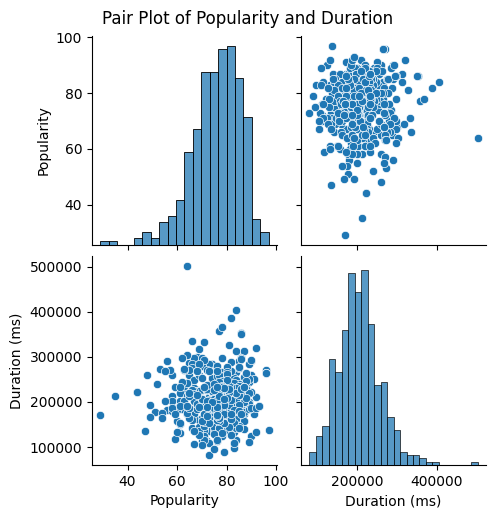

In [41]:
sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.suptitle('Pair Plot of Popularity and Duration', y=1.02)
plt.show()

## Question 9: Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

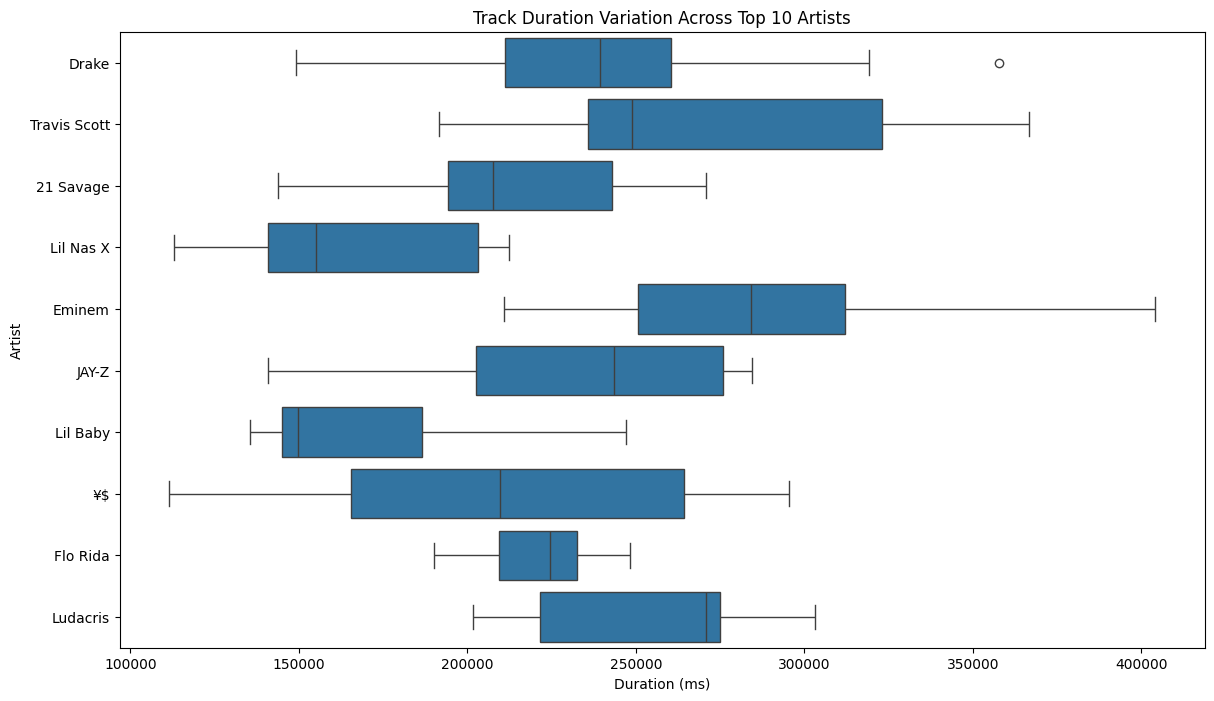

In [42]:
# To avoid clutter, let's visualize this for a subset of artists, e.g., the top 10 by track count
top_10_artists = df['Artist'].value_counts().index[:10]
df_top_10_artists = df[df['Artist'].isin(top_10_artists)]

plt.figure(figsize=(14, 8))
sns.boxplot(x='Duration (ms)', y='Artist', data=df_top_10_artists)
plt.title('Track Duration Variation Across Top 10 Artists')
plt.xlabel('Duration (ms)')
plt.ylabel('Artist')
plt.show()

## Question 10: How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

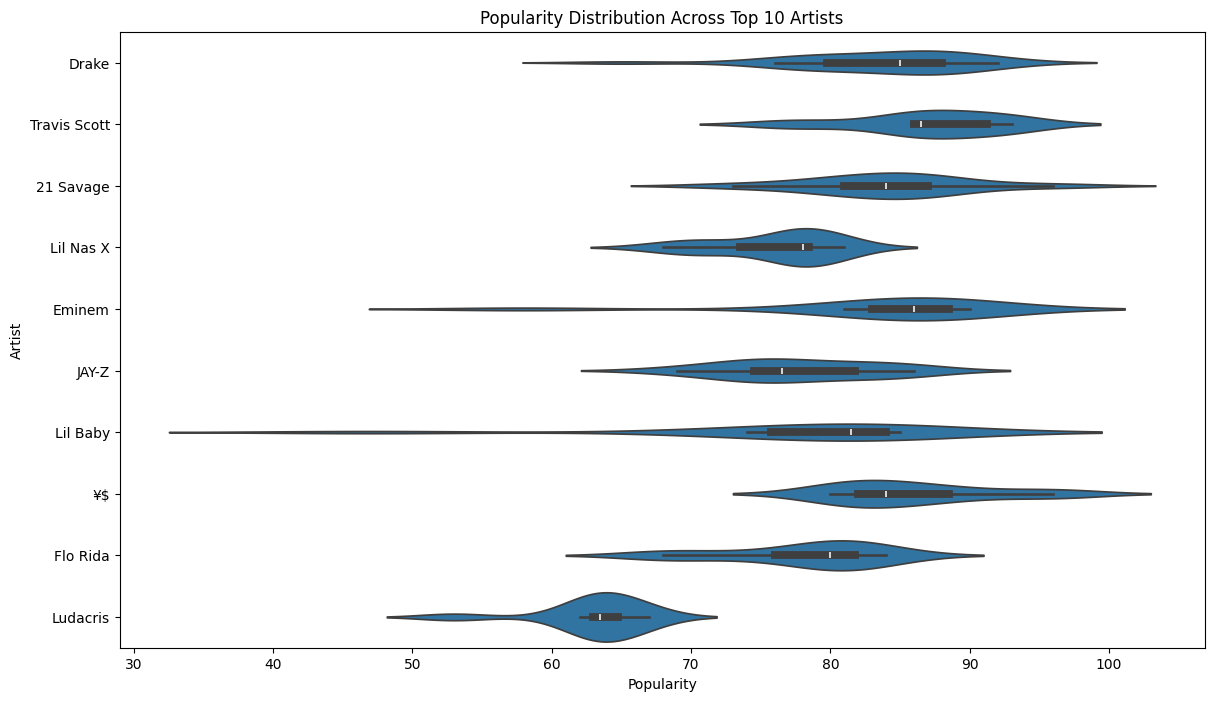

In [43]:
# To avoid clutter, let's visualize this for a subset of artists, e.g., the top 10 by track count
top_10_artists = df['Artist'].value_counts().index[:10]
df_top_10_artists = df[df['Artist'].isin(top_10_artists)]

plt.figure(figsize=(14, 8))
sns.violinplot(x='Popularity', y='Artist', data=df_top_10_artists)
plt.title('Popularity Distribution Across Top 10 Artists')
plt.xlabel('Popularity')
plt.ylabel('Artist')
plt.show()